In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = float(num) * 10000000
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [3]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [7]:
all_files = ["Data/11.csv"] # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv",
# "Data/71.csv", "Data/1.csv",
#, "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
         #"Data/25.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/36.csv", 
         #"Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv", 
         #"Data/51.csv", "Data/54.csv", "Data/56.csv", "Data/59.csv",  
         #"Data/63.csv", "Data/67.csv", "Data/68.csv", "Data/70.csv", "Data/72.csv", 
         #"Data/76.csv", "Data/79.csv", 
         #"Data/80.csv", "Data/82.csv", "Data/91.csv"
# Lone file works, needs to be scaled up

In [34]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit
        

    df1 = get_frequencies(last_digits)
    
    column_data = {}

    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies

        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
        column_data[key] = frequencies['Percentage']
 
    
    df5 = pd.DataFrame(column_data)
    df5['Average'] = df1['freq'] / sum(df1['freq']) * 100
    print(df5)
    df5 = df5.drop([0])
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100

    
    

#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
        LL.4       LL.8      LL.12      LL.16      LL.20      LL.24  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1  31.728045  23.418319  27.573182  33.522191  34.183192  35.977337   
2  21.435316  19.169027  21.624174  17.280453  20.113314  18.413598   
3  13.975449  19.357885  14.164306  10.859301  12.653447  10.670444   
4   8.970727  12.086874   9.537299   9.159585   7.459868   7.459868   
5   5.854580   8.498584   6.610009   6.610009   6.232295   6.610009   
6   5.099150   5.949008   6.610009   7.271010   5.949008   5.665722   
7   4.060434   4.154863   5.571294   5.571294   4.343720   3.966006   
8   3.966006   4.154863   4.249292   5.099150   4.532578   5.665722   
9   4.910293   3.210576   4.060434   4.627007   4.532578   5.571294   

       LL.28      LL.32      LL.36      LL.40      LL.44      LL.48    Average  
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
1  34.560907  22.474032  28.895184  38.432483  33.2389

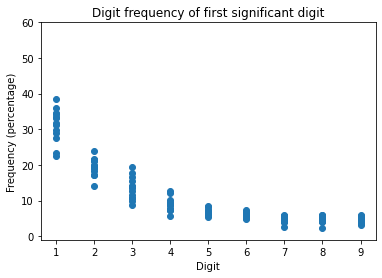

In [45]:
df6 = pd.DataFrame(df5).T.stack().reset_index()#.drop(columns=['level_1'])
df6 = df6.rename(columns={0: "Frequency (percentage)", "level_1": "Digit"})

plt.scatter(x = 'Digit', y = 'Frequency (percentage)', data = df6)
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 60)
plt.ylabel("Frequency (percentage)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
plt.savefig('Data/fig1a', dpi=300)
plt.show()

In [43]:
print(df5.std(axis = 1))

1    4.673896
2    2.501061
3    3.164291
4    1.950305
5    0.850841
6    0.682933
7    0.893753
8    0.985205
9    0.780427
dtype: float64


In [13]:
#  df3 = None
#  first = True
#  i = 1
#  for file in files2:
#     print(i)
#     i += 1
#     data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
#     last_digits = [] #
#     last_digit_dict = {}
#     last_digit_freq = {}

#     for column in data:
#         nums = data[column]
#         last_digit = [first_after_decimal(num) for num in nums]
#         #last_digit = [first_digit(num) for num in nums]
#         last_digits += last_digit
#         last_digit_dict[column] = last_digit

#     df1 = pd.Series(last_digits).value_counts().sort_index().reset_index().reset_index(drop=True)


#     for key in last_digit_dict.keys():
#         frequencies = pd.Series(last_digit_dict[key]).value_counts().sort_index().reset_index().reset_index(drop=True)
#         frequencies.columns = ['Element', 'Frequency']
#         frequencies['Percentage'] = frequencies['Frequency'] / sum(frequencies['Frequency']) * 100
#         last_digit_freq[key] = frequencies
#         message = (f"{key}"
#         f"{frequencies}"
#         f"")
#         #print(message)

#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df3 = df1[['Element', 'Percentage']].copy()
#         df3.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df3[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

In [33]:
# df2 = df2.set_index('Element')
#df2 = df2.drop([0])
#print(df2)

In [7]:
# df3 = df3.set_index('Element')
# print(df3)

In [8]:
# transposed = df2.transpose()[1:].copy()

In [9]:
# plt.boxplot(df3, sym="r.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# # plt.ylim(0, 45)
# plt.ylabel("Frequency (percentage)")
# plt.xlabel("Digit")
# plt.title("Digit frequency of first number after decimal")
# plt.show()

In [41]:
# df4 = pd.DataFrame(df2).T.stack().reset_index()#.drop(columns=['level_1'])
# df4 = df4.rename(columns={0: "Frequency (percentage)", "level_1": "Digit"})
# print(df4)

In [11]:
# df5 = pd.DataFrame(df3).T.stack().reset_index()#.drop(columns=['level_1'])
# print(df5.head(15))

In [39]:
# plt.boxplot(df2, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 60)
# plt.ylabel("Frequency (percentage)")
# plt.xlabel("Digit")
# plt.title("Digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
# plt.show()

In [40]:
# import seaborn as sns
# sns.stripplot(x = 'Digit', y = 'Frequency (percentage)', data = df4, jitter=True, color = 'black')
# sns.stripplot(x = 'Element', y = 0, data = df5, jitter=True, color = 'blue')
# sns.despine()

In [14]:
# sns.stripplot(x = 'Element', y = 0, data = df4, jitter=True, color = 'black')


In [15]:
# sns.stripplot(x = 'Element', y = 0, data = df5, jitter=True, color = 'blue')